<a href="https://colab.research.google.com/github/adiitya24/BCT_LAB/blob/main/BCT_Lab2_AdityaChoudhary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import datetime

def get_ethereum_transactions(address, api_key):
    url = 'https://api.etherscan.io/api'

    params = {
        'module': 'account',
        'action': 'txlist',
        'address': address,
        'startblock': 0,
        'endblock': 99999999,
        'sort': 'desc',
        'apikey': api_key
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()

        if 'status' in data and data['status'] == '1':
            transactions = data.get('result', [])
            print(f"Total transactions found: {len(transactions)}")

            for tx in transactions:
                tx_hash = tx.get('hash', 'N/A')
                tx_from = tx.get('from', 'N/A')
                tx_to = tx.get('to', 'N/A')
                tx_value = int(tx.get('value', 0)) / 10**18
                tx_gas = int(tx.get('gas', 0))
                tx_gas_price = int(tx.get('gasPrice', 0)) / 10**9

                gas_used_per_ether = tx_gas / tx_value if tx_value > 0 else 0

                tx_timestamp = tx.get('timeStamp', 'N/A')
                if tx_timestamp != 'N/A':
                    tx_timestamp = datetime.datetime.fromtimestamp(int(tx_timestamp)).strftime('%Y-%m-%d %H:%M:%S')

                print(f"Hash: {tx_hash}")
                print(f"From: {tx_from}")
                print(f"To: {tx_to}")
                print(f"Value: {tx_value} ETH")
                print(f"Gas Used: {tx_gas}")
                print(f"Gas Price: {tx_gas_price} Gwei")
                print(f"Gas Used per Ether Value: {gas_used_per_ether:.2f} Gas/Ether")
                print(f"Timestamp: {tx_timestamp}")
                print('---')
        else:
            print(f"Error: {data.get('message', 'Unknown error')}")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

if __name__ == "__main__":
    address = '0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5'
    api_key = 'E4BD1Y1B5ZWF4XV7PWAJ4PHFXS2HY6BFW4'

    get_ethereum_transactions(address, api_key)

Streaming output truncated to the last 5000 lines.
Gas Used: 21000
Gas Price: 15.76855642 Gwei
Gas Used per Ether Value: 85776.43 Gas/Ether
Timestamp: 2024-08-21 14:37:35
---
Hash: 0x7053d19297d42d73e59fd8d7eed6a92483276a9dce645dc1bbbe16630f2da477
From: 0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5
To: 0xd4e96ef8eee8678dbff4d535e033ed1a4f7605b7
Value: 0.22045942940398827 ETH
Gas Used: 23100
Gas Price: 9.983706036 Gwei
Gas Used per Ether Value: 104781.18 Gas/Ether
Timestamp: 2024-08-21 14:35:35
---
Hash: 0x8c2024fb38b0f6d3c7a7793390e69f23fc799fea73714afe7f735fb98bf3510b
From: 0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5
To: 0x23c2ee338520ddab9dec2e48b4e511ee6b5f4ae0
Value: 0.14309843045849746 ETH
Gas Used: 21033
Gas Price: 10.292687099 Gwei
Gas Used per Ether Value: 146982.74 Gas/Ether
Timestamp: 2024-08-21 14:35:23
---
Hash: 0xab42f65d5e9dcbeae54ebd98a723468a126f209ae5d355fc52e0feaf8f6abb94
From: 0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5
To: 0x48319f97e5da1233c21c48b80097c0fb7a20ff86
Value

Total transactions found: 10000


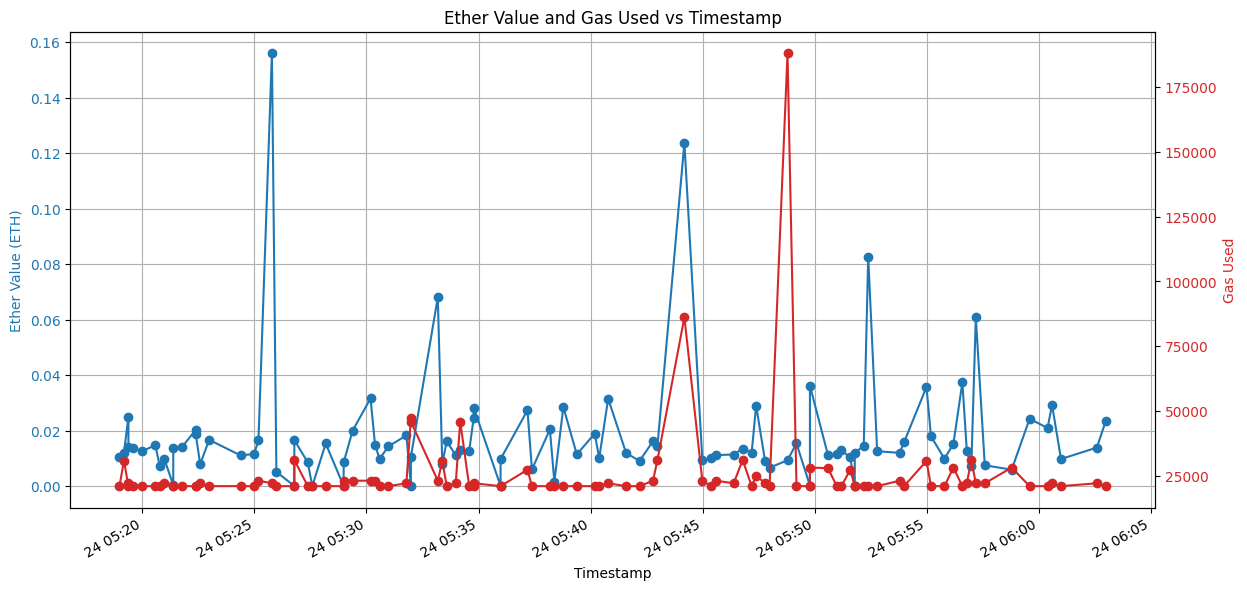

In [2]:
import requests
import datetime
import matplotlib.pyplot as plt

def get_ethereum_transactions(address, api_key, limit=50):
    url = 'https://api.etherscan.io/api'

    params = {
        'module': 'account',
        'action': 'txlist',
        'address': address,
        'startblock': 0,
        'endblock': 99999999,
        'sort': 'desc',
        'apikey': api_key
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()

        if 'status' in data and data['status'] == '1':
            transactions = data.get('result', [])
            total_transactions = len(transactions)
            print(f"Total transactions found: {total_transactions}")

            transactions = transactions[:limit]
            timestamps = []
            values = []
            gas_used = []

            for tx in transactions:
                tx_value = int(tx.get('value', 0)) / 10**18
                tx_gas = int(tx.get('gas', 0))
                tx_timestamp = int(tx.get('timeStamp', 0))

                date_time = datetime.datetime.fromtimestamp(tx_timestamp)
                timestamps.append(date_time)
                values.append(tx_value)
                gas_used.append(tx_gas)

            fig, ax1 = plt.subplots(figsize=(14, 7))

            color = 'tab:blue'
            ax1.set_xlabel('Timestamp')
            ax1.set_ylabel('Ether Value (ETH)', color=color)
            ax1.plot(timestamps, values, marker='o', linestyle='-', color=color)
            ax1.tick_params(axis='y', labelcolor=color)
            ax1.set_title('Ether Value and Gas Used vs Timestamp')
            ax1.grid(True)

            ax2 = ax1.twinx()
            color = 'tab:red'
            ax2.set_ylabel('Gas Used', color=color)
            ax2.plot(timestamps, gas_used, marker='o', linestyle='-', color=color)
            ax2.tick_params(axis='y', labelcolor=color)

            fig.autofmt_xdate()
            plt.show()

        else:
            print(f"Error: {data.get('message', 'Unknown error')}")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

if __name__ == "__main__":
    address = '0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5'
    api_key = 'E4BD1Y1B5ZWF4XV7PWAJ4PHFXS2HY6BFW4'

    get_ethereum_transactions(address, api_key, limit=100)